In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wZDsx4YSEuuSiBfQHaaC")
project = rf.workspace("fydp-obdrh").project("fyp-gtmdx")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.5, to fix: `pip install ultralytics==8.0.196`


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml optimizer= epochs=20 imgsz=640

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/fyp-1/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

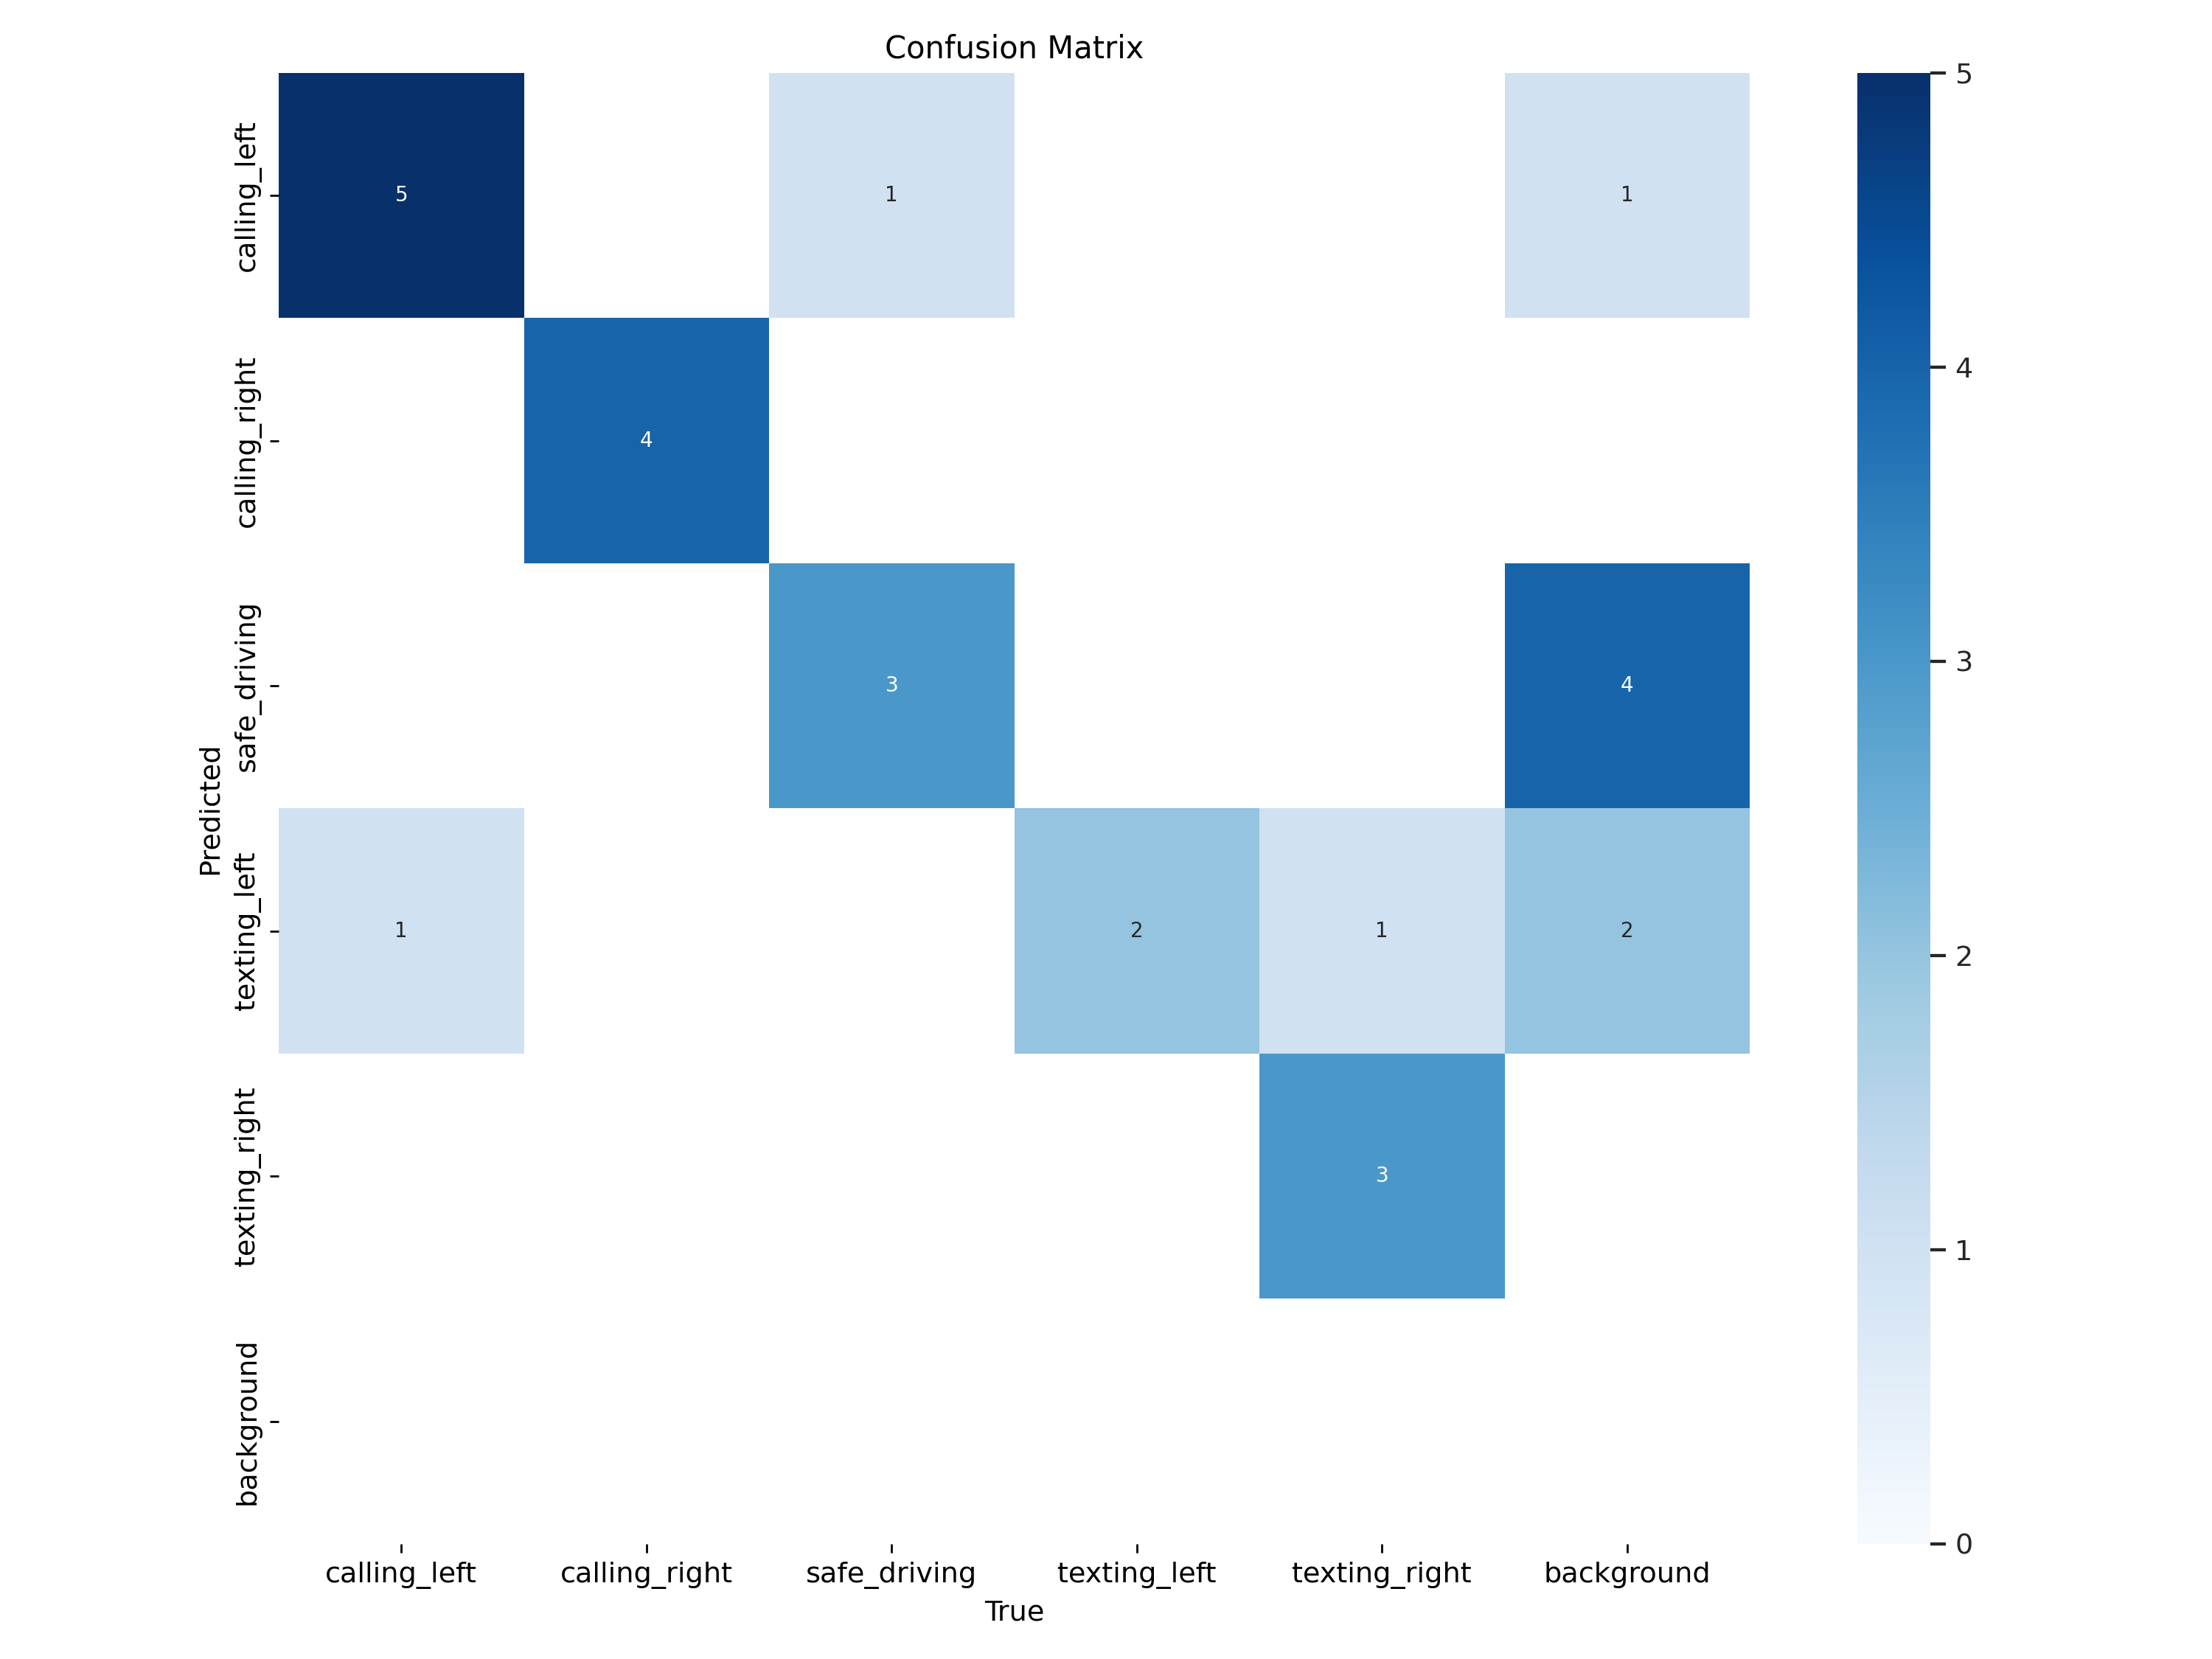

In [ ]:
Image(filename=f'/content/runs/detect/train3/confusion_matrix.png', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train3/confusion_matrix.png', width=600)

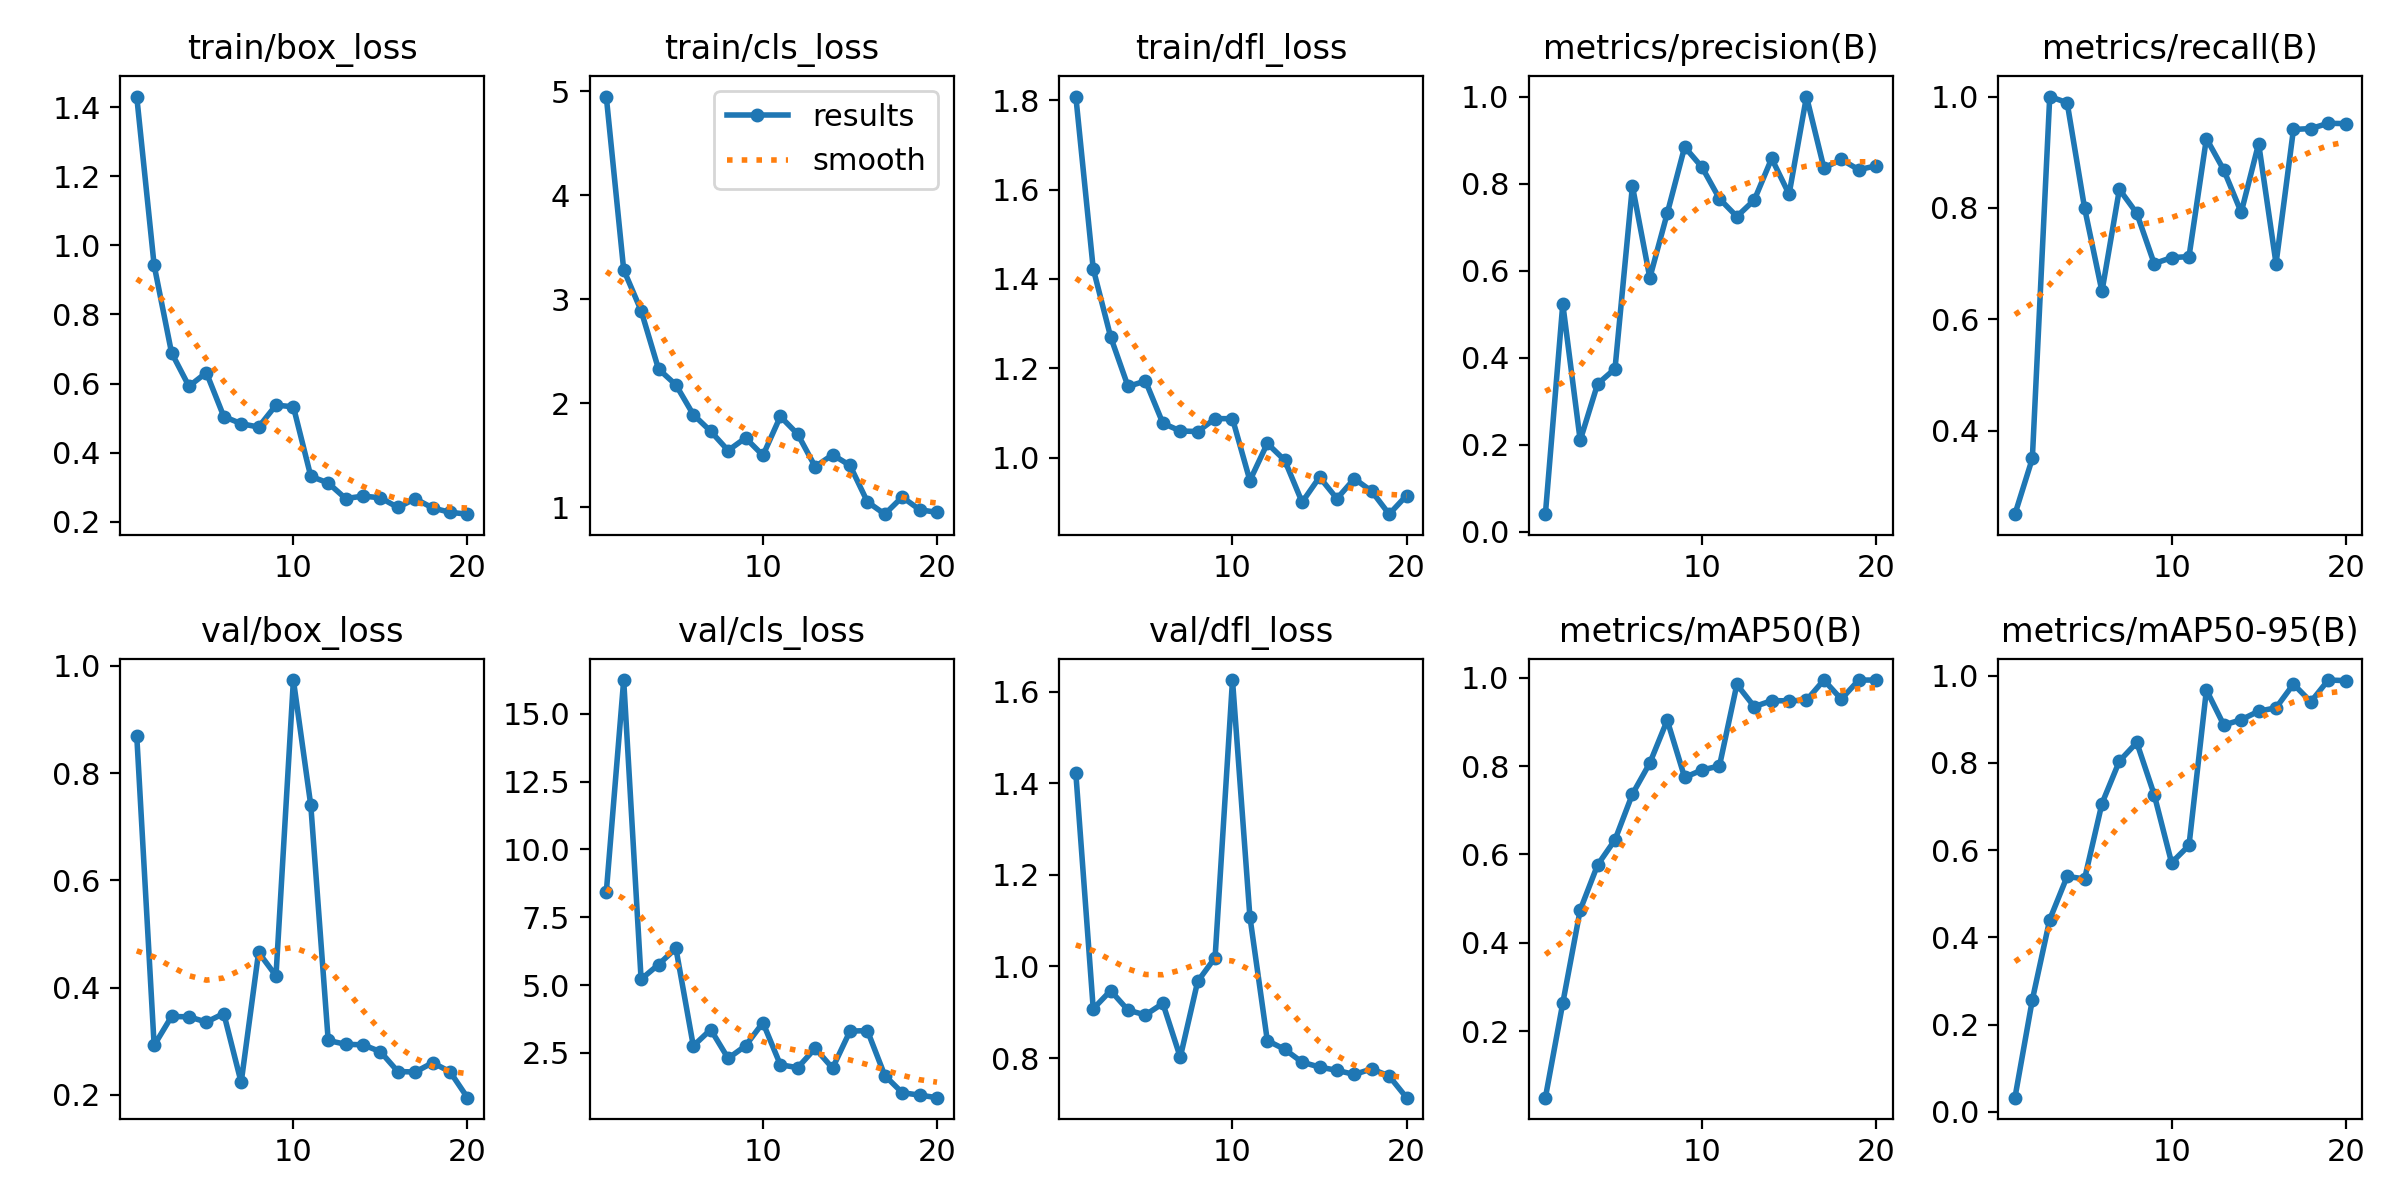

In [ ]:
Image(filename=f'/content/runs/detect/train3/results.png', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/fyp-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.18s/it]
                   all         20         20      0.832      0.952      0.995       0.99
          calling_left         20          6      0.913          1      0.995      0.995
         calling_right         20          4      0.942          1      0.995       0.97
          safe_driving         20          4      0.929          1      0.995      0.995
          texting_left         20          2      0.374          1      0.995      0.995
         texting_right         20          4          1       0.76      0.995      0.995
Speed: 7.1ms preprocess, 50.3ms inference, 0.0ms loss, 35.4

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=True save_conf=True show_labels=True show_boxes=True

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

image 1/10 /content/fyp-1/test/images/20231129_144813_jpg.rf.cd045caf39c4ed34dd136f9114e12ee9.jpg: 640x640 1 safe_driving, 1 texting_left, 37.3ms
image 2/10 /content/fyp-1/test/images/20231129_144912-0-_jpg.rf.23899ea9fb0c5a8754dcd05067cc6937.jpg: 640x640 1 safe_driving, 37.2ms
image 3/10 /content/fyp-1/test/images/20231129_145414_jpg.rf.a75be1c0f700ddf7b219b089bc9e355b.jpg: 640x640 1 safe_driving, 37.1ms
image 4/10 /content/fyp-1/test/images/20231129_145841_jpg.rf.825de7be12824a37a41fcd6dd017f2ec.jpg: 640x640 1 texting_left, 37.2ms
image 5/10 /content/fyp-1/test/images/20231129_150422-1-_jpg.rf.d3293b764c810304c1ca31a80e41f589.jpg: 640x640 1 texting_left, 37.2ms
image 6/10 /content/fyp-1/test/images/20231129_150739_jpg.rf.1ffee635d2d0583502683f611c02ac58.jpg: 640x640 1 safe_driving, 25.1ms
image 7/10 /content/fyp-1/test

In [ ]:
import glob
from IPython.display import display, Image

for image_path in glob.glob(f'/content/runs/detect/predict2*jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

In [ ]:
!yolo task=detect mode=train model=yolov8n.yaml data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/fyp-1/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

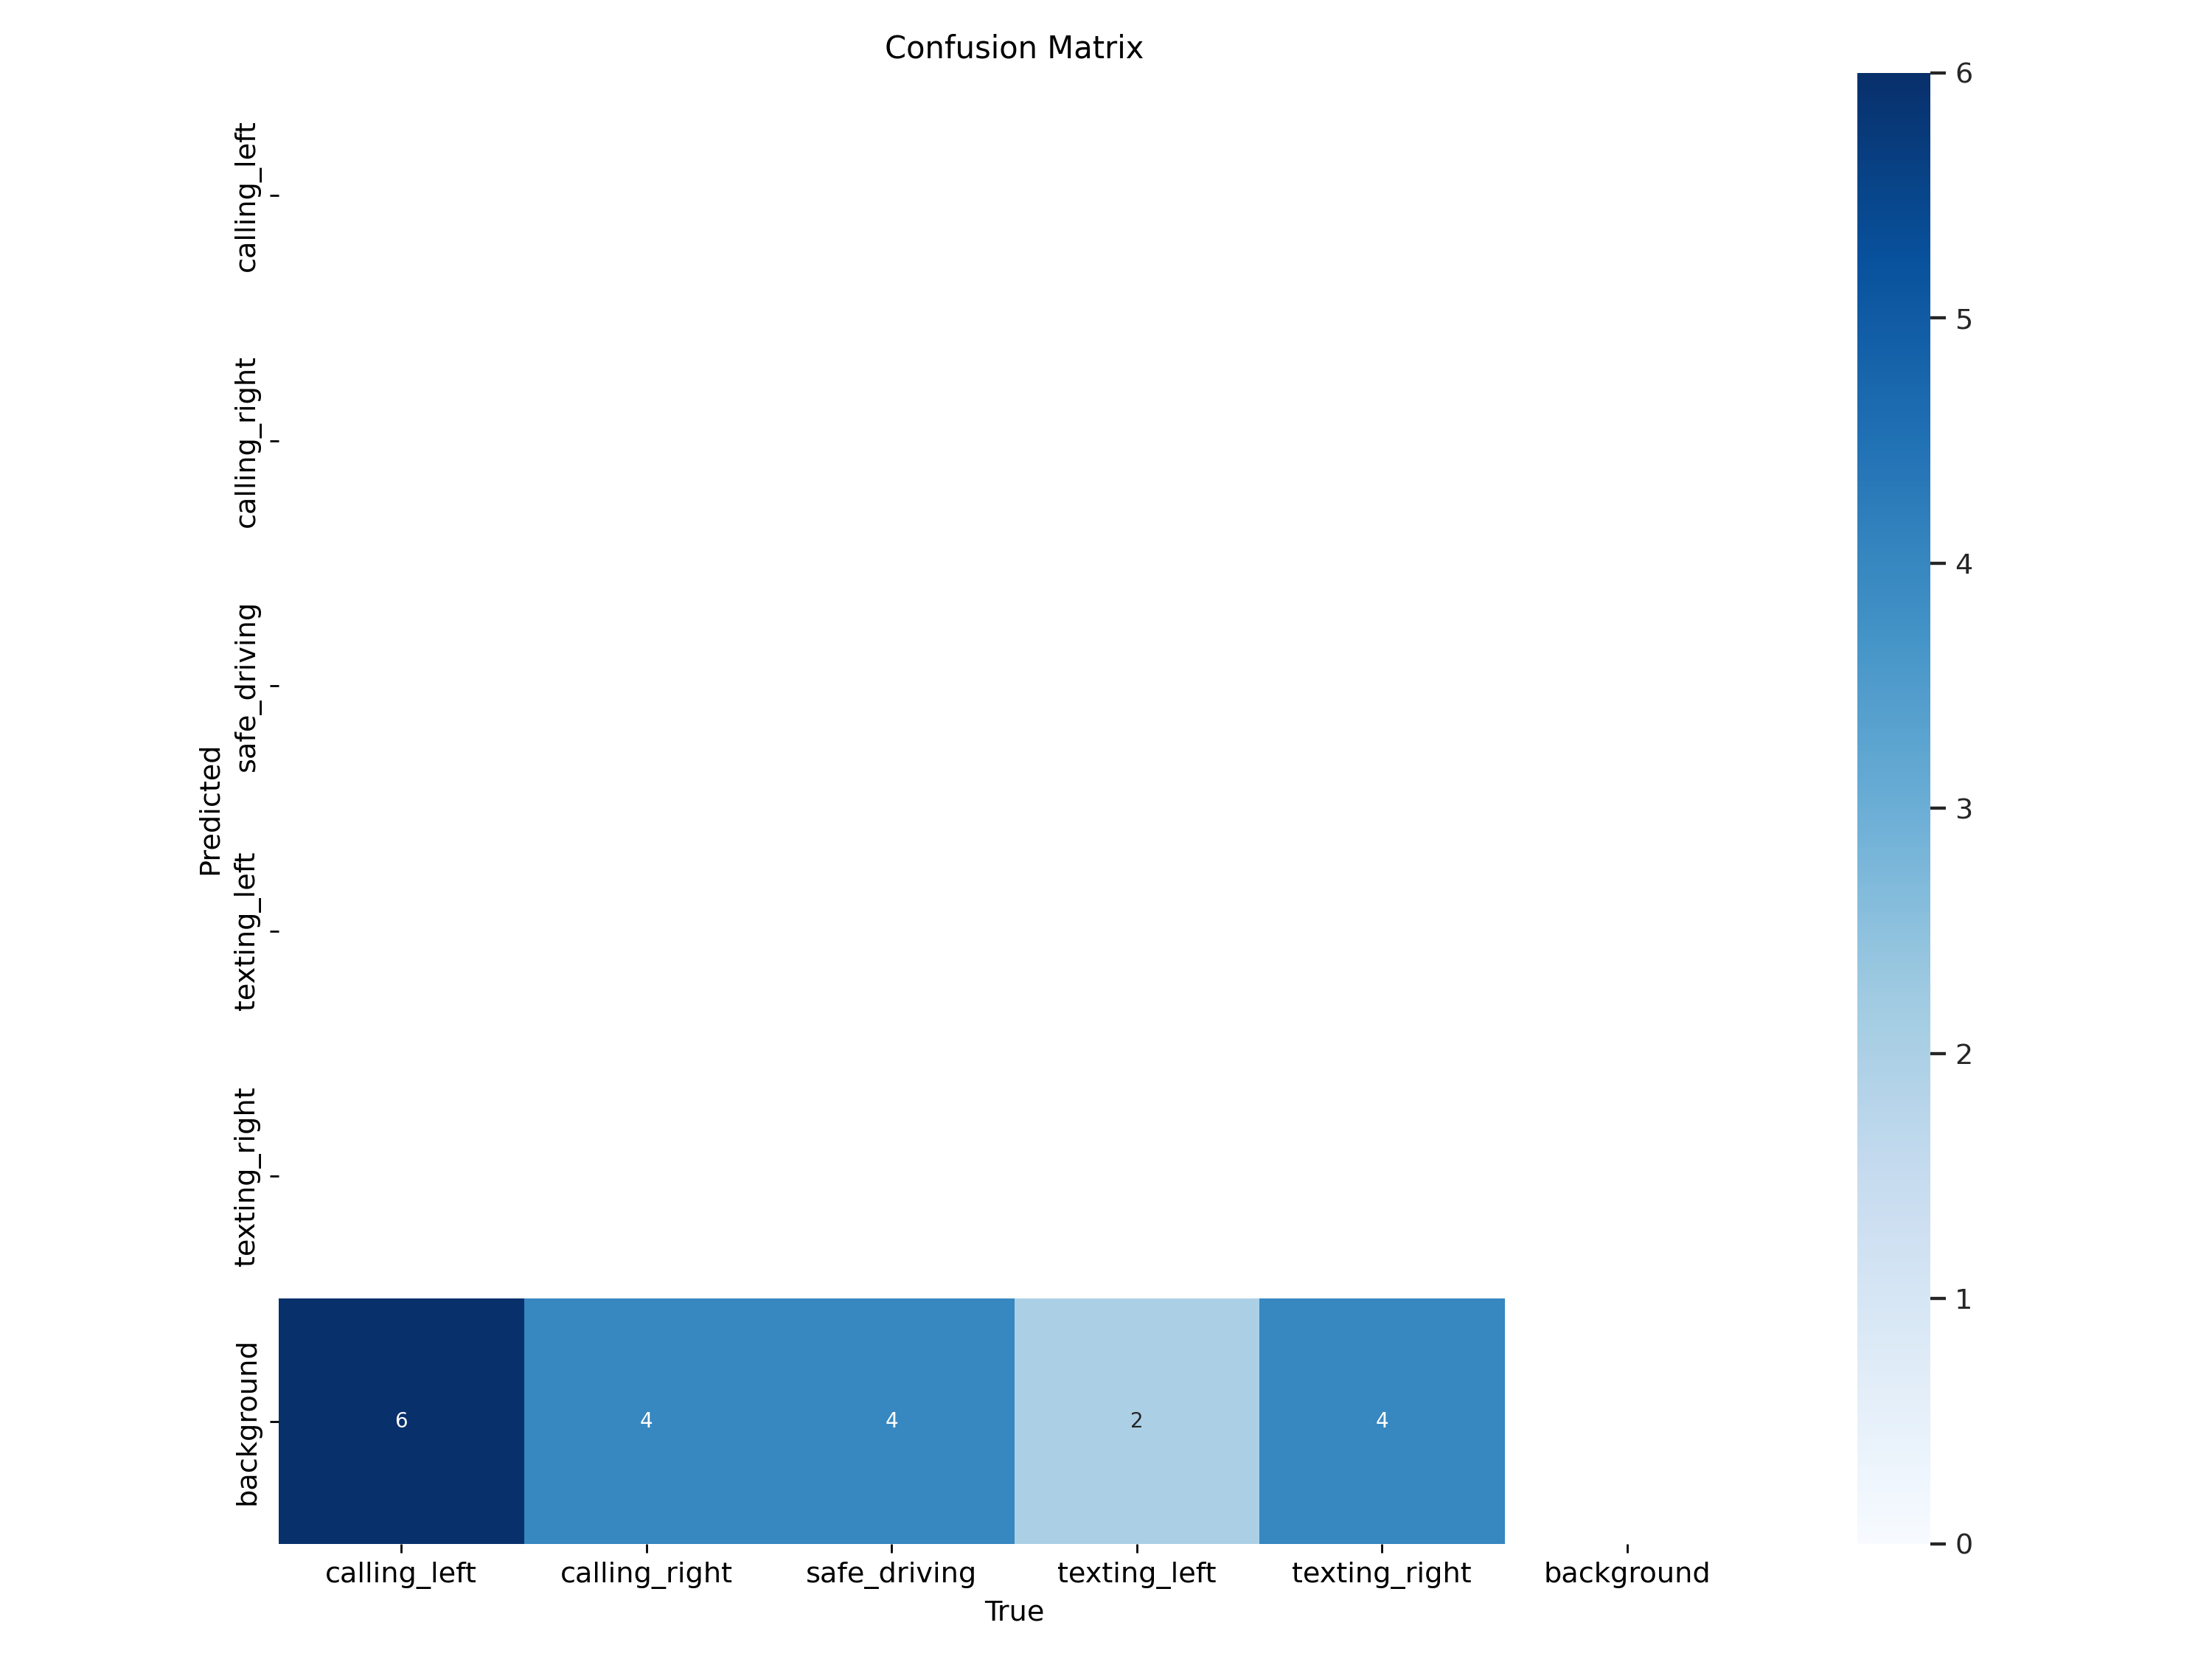

In [ ]:
Image(filename=f'/content/runs/detect/train6/confusion_matrix.png', width=600)